## <font color='RED'>Assignment 10: Ensemble Algorithm: AdaBoost Classifier </font> <br>
### Supervised Machine Learning Lab<br>
### <font color='green'>Kaustubh Raykar <br> PRN : 21070126048 <br>  <break> AIML A3 </font>

### <font color='blue'> Importing Libraries </font>

In [159]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### <font color='blue'> Importing Datasets </font>

In [160]:
# Import the train and test datasets
train_df = pd.read_csv('/train.csv')
test_df = pd.read_csv('/test.csv')

In [161]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### <font color='blue'> Data Preparation </font>

In [162]:
# Check the number of observations and variables in each dataset
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

Train dataset shape: (891, 12)
Test dataset shape: (418, 11)


In [163]:
train_df.drop('Embarked', axis=1, inplace=True)


In [164]:
# Explore the variables in the dataset using summary statistics
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### <font color='blue'> Data Preprocessing </font>

In [165]:
# Preprocessing: Convert categorical variable (gender) to numeric
train_df['Sex'] = train_df['Sex'].map({'female': 1, 'male': 0})
test_df['Sex'] = test_df['Sex'].map({'female': 1, 'male': 0})

### <font color='blue'> Handling missing values</font>

In [166]:
# Identify missing values and outliers
print(train_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64


In [167]:
# Replace missing values in Age column with mean
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
# Replace missing values in Cabin column with "Unknown"
train_df['Cabin'].fillna("Unknown", inplace=True)

In [168]:
# Check the correlation between the variables
print(train_df.corr())

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.331339  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.084153  0.114631   
Age             0.033207 -0.069809 -0.331339 -0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.091566  0.159651   

                Parch      Fare  
PassengerId -0.001652  0.012658  
Survived     0.081629  0.257307  
Pclass       0.018443 -0.549500  
Sex          0.245489  0.182333  
Age         -0.179191  0.091566  
SibSp        0.414838  0.159651  
Parch        1.000000  0.216225  
Fare         0.216225  1.

<ipython-input-168-d5d3c463288d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(train_df.corr())


### <font color='blue'> EDA Graphs </font>

<ipython-input-169-4fa29194241a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True)


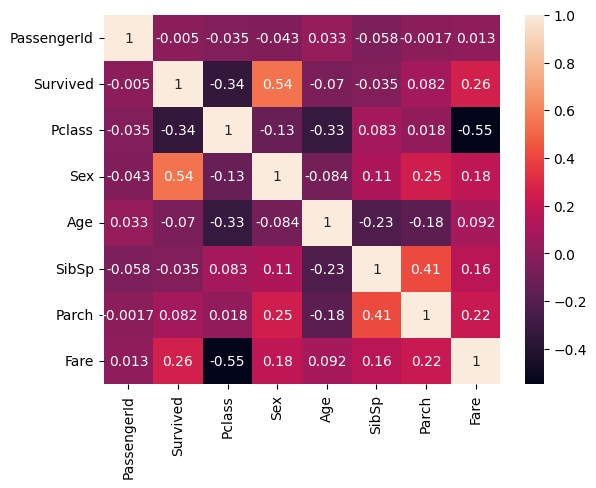

In [169]:
# Check the correlation between the numerical variables
sns.heatmap(train_df.corr(), annot=True)
plt.show()

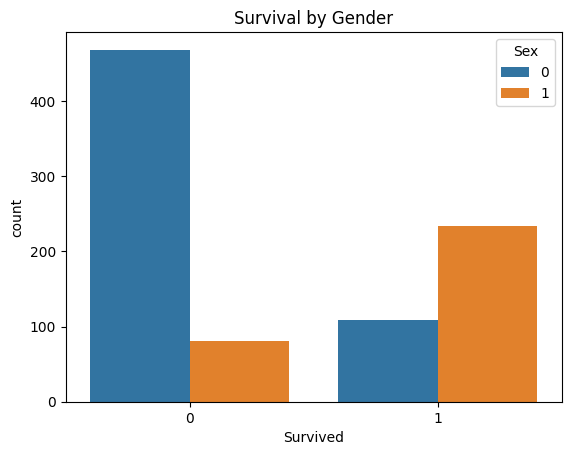

In [170]:
# Visualize the relationship between gender and survival using a bar plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Gender')
plt.show()

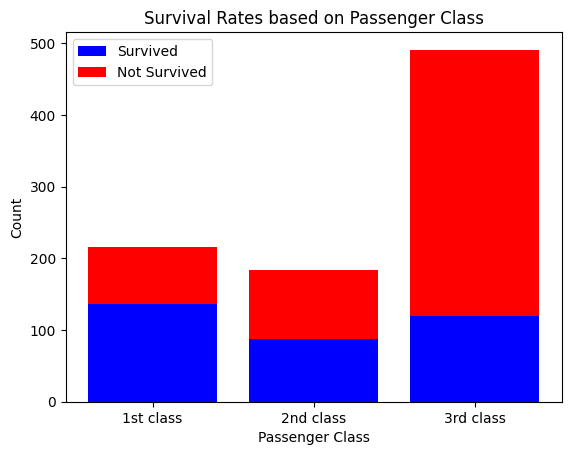

In [171]:
# Visualize the survival rate based on the passenger class using a stacked bar chart
survived_1st_class = train_df[(train_df['Survived'] == 1) & (train_df['Pclass'] == 1)]['Survived'].count()
survived_2nd_class = train_df[(train_df['Survived'] == 1) & (train_df['Pclass'] == 2)]['Survived'].count()
survived_3rd_class = train_df[(train_df['Survived'] == 1) & (train_df['Pclass'] == 3)]['Survived'].count()
not_survived_1st_class = train_df[(train_df['Survived'] == 0) & (train_df['Pclass'] == 1)]['Survived'].count()
not_survived_2nd_class = train_df[(train_df['Survived'] == 0) & (train_df['Pclass'] == 2)]['Survived'].count()
not_survived_3rd_class = train_df[(train_df['Survived'] == 0) & (train_df['Pclass'] == 3)]['Survived'].count()

survival_rates = np.array([[survived_1st_class, survived_2nd_class, survived_3rd_class],
                           [not_survived_1st_class, not_survived_2nd_class, not_survived_3rd_class]])

x_labels = ['1st class', '2nd class', '3rd class']

plt.bar(x_labels, survival_rates[0], label='Survived', color='blue')
plt.bar(x_labels, survival_rates[1], bottom=survival_rates[0], label='Not Survived', color='red')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Survival Rates based on Passenger Class')
plt.legend()
plt.show()

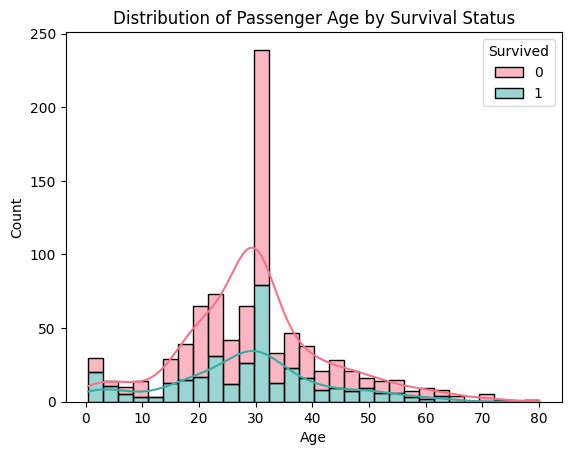

In [172]:
# Distribution of passenger age by survival status
sns.histplot(data=train_df, x="Age", hue="Survived", multiple="stack", kde=True, palette="husl")
plt.title("Distribution of Passenger Age by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


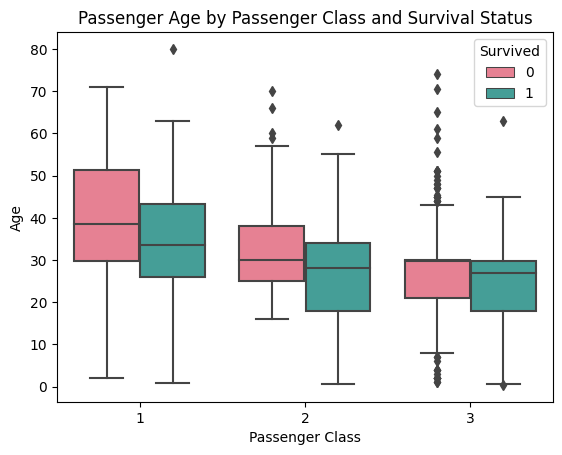

In [173]:
# Box plot of passenger age by passenger class and survival status
sns.boxplot(data=train_df, x="Pclass", y="Age", hue="Survived", palette="husl")
plt.title("Passenger Age by Passenger Class and Survival Status")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.show()


### <font color='blue'> Splitting data into X and y </font>

In [174]:
# Split the data into features and target variable
X = train_df[['Sex']]
y = train_df[['Survived']]

### <font color='blue'> Splitting data into train and test </font>

In [175]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <font color='blue'> Importing and Fitting AdaBoost Model</font>

In [176]:
# Create the AdaBoost Classifier model
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

In [177]:
# Train the model
ada.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [178]:
# Make predictions on the test data
y_pred = ada.predict(X_test)

### <font color='blue'> Model Evaluation </font>

In [179]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7821229050279329


### <font color='blue'> Creating a csv file </font>

In [180]:
# Make predictions on the test set and create a submission file
test_X = test_df[['Sex']]
test_df['Survived'] = ada.predict(test_X)
submission = test_df[['PassengerId', 'Survived']]
submission.to_csv('submission.csv', index=False)

In [181]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive


### <font color='blue'> Downloading the csv file </font>

In [182]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### <font color='blue'> THANK YOU </font>